In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

# 0. Data Loading

In [44]:
data = pd.read_csv('data/weatherAUS.csv')
data.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [45]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [46]:
# To identify the missing values and type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [47]:
# There are some features that has few unique values even though they are float
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [48]:
# Drop the Nan values in the target variable
data.dropna(subset=['RainTomorrow'], inplace=True)

<AxesSubplot:>

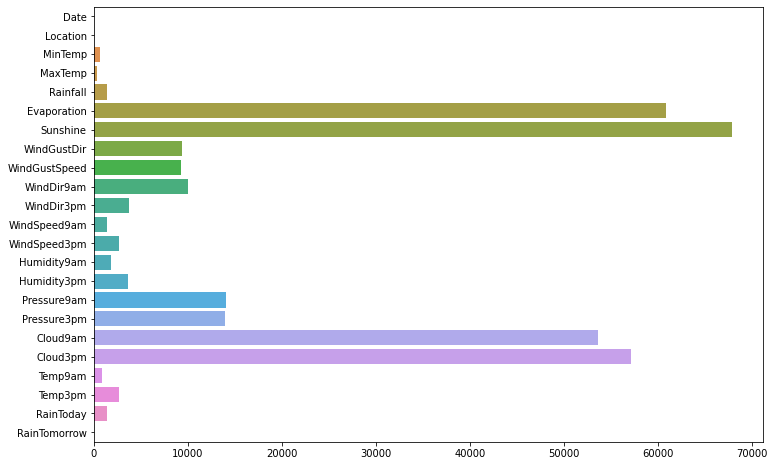

In [49]:
sns.barplot(y=data.isnull().sum().index, x=data.isnull().sum().values)

# 1. Remove outlier

~~The first step is to remove the outlier.~~

<AxesSubplot:title={'center':'WindSpeed9am'}, xlabel='RainTomorrow'>

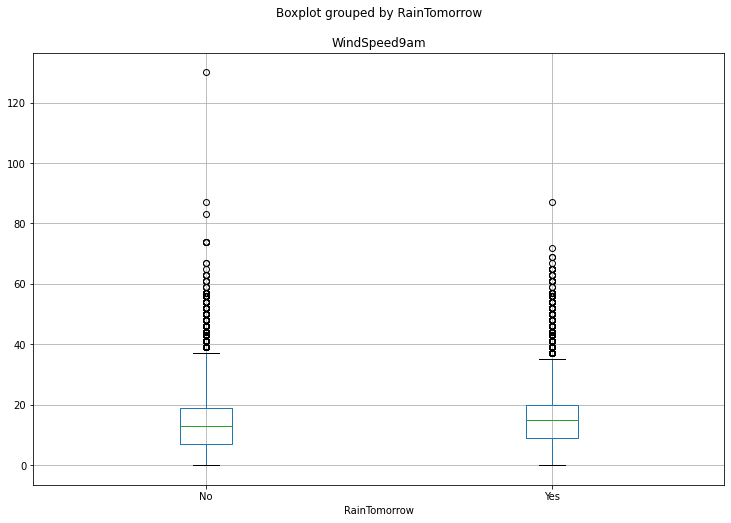

In [9]:
data.boxplot(column='WindSpeed9am', by='RainTomorrow')

In [13]:
# Quantile also useful
q = data.quantile([0.05, 0.95])
q

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0.05,1.8,12.8,0.0,1.0,0.3,20.0,0.0,6.0,34.0,17.0,1006.2,1004.0,0.0,0.0,6.9,11.6
0.95,23.0,35.5,13.0,12.0,12.8,65.0,30.0,35.0,98.0,88.0,1029.5,1026.9,8.0,8.0,28.2,33.7


### Remove outliers by sigma

In [8]:
# numerical_cols = data.select_dtypes(include=np.number).columns
# sigma = 4
# new_data = data.copy()
# for col in numerical_cols:
#     less_than_sigma = max(data[col].mean() - sigma*data[col].std(), data[col].min())
#     greater_than_sigma = min(data[col].mean() + sigma*data[col].std(), data[col].max())
#     print(f'Col: {col}, {less_than_sigma, greater_than_sigma}')
#     new_data = new_data.query(
#         f'{col} > {less_than_sigma} and {col} < {greater_than_sigma}'
#     )
# else:
#     print(new_data.shape)
    

Col: MinTemp, (-8.5, 33.9)
Col: MaxTemp, (-4.8, 48.1)
Col: Rainfall, (0.0, 36.21066574477668)
Col: Evaporation, (0.0, 22.223970251929742)
Col: Sunshine, (0.0, 14.5)
Col: WindGustSpeed, (6.0, 94.33949471952724)
Col: WindSpeed9am, (0.0, 49.575336393932005)
Col: WindSpeed3pm, (0.0, 53.85095600673932)
Col: Humidity9am, (0.0, 100.0)
Col: Humidity3pm, (0.0, 100.0)
Col: Pressure9am, (989.2318555698819, 1041.0)
Col: Pressure3pm, (987.1114964039162, 1039.6)
Col: Cloud9am, (0.0, 9.0)
Col: Cloud3pm, (0.0, 9.0)
Col: Temp9am, (-7.2, 40.2)
Col: Temp3pm, (-5.4, 46.7)
(17086, 23)


<AxesSubplot:title={'center':'WindSpeed9am'}, xlabel='RainTomorrow'>

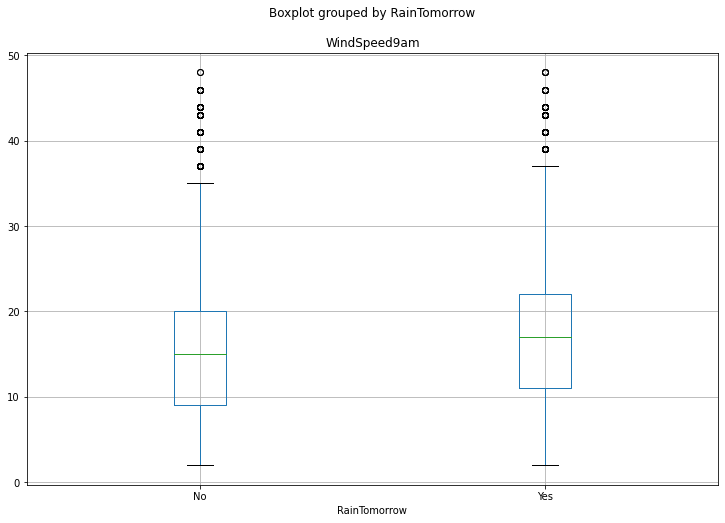

In [40]:
new_data.boxplot(column='WindSpeed9am', by='RainTomorrow')

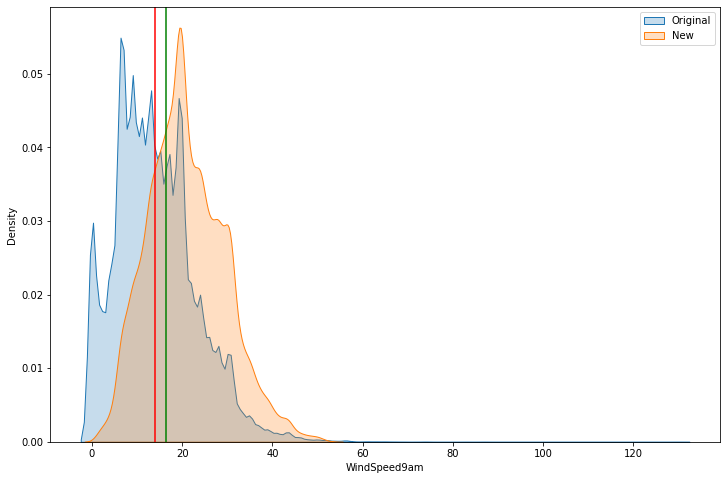

In [15]:
# Data distribution before and after removing outliers
sns.kdeplot(data['WindSpeed9am'], shade=True)
sns.kdeplot(new_data['WindSpeed3pm'], shade=True)
plt.axvline(data['WindSpeed9am'].mean(), color='r')
plt.axvline(new_data['WindSpeed9am'].mean(), color='g')
plt.legend(['Original', 'New'])

In [41]:
new_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000,17086.000000
mean,13.457064,21.452774,4.716382,4.007480,6.171000,42.997074,16.398513,20.935561,76.052967,60.406766,1016.068834,1014.504846,5.487534,5.360880,16.801539,19.922047
std,6.324039,6.436463,6.528159,2.685596,3.359295,13.731613,8.194110,8.512258,13.828739,15.754049,7.355481,7.393766,2.273704,2.158062,6.431169,6.332430
min,-5.200000,6.300000,0.100000,0.100000,0.100000,13.000000,2.000000,2.000000,10.000000,1.000000,989.500000,987.300000,1.000000,1.000000,-0.700000,4.300000
25%,8.500000,16.300000,0.600000,2.000000,3.500000,33.000000,11.000000,15.000000,67.000000,50.000000,1011.100000,1009.200000,4.000000,4.000000,11.700000,14.900000
50%,12.700000,20.400000,2.000000,3.400000,6.300000,41.000000,15.000000,20.000000,77.000000,60.000000,1016.000000,1014.600000,7.000000,6.000000,15.700000,18.900000
75%,18.500000,26.300000,6.000000,5.400000,8.800000,52.000000,20.000000,26.000000,87.000000,71.000000,1021.000000,1019.600000,7.000000,7.000000,21.600000,24.500000
max,28.600000,44.000000,36.200000,22.000000,14.200000,94.000000,48.000000,52.000000,99.000000,99.000000,1040.300000,1037.600000,8.000000,8.000000,35.800000,42.900000


<AxesSubplot:title={'center':'WindGustSpeed'}, xlabel='RainTomorrow'>

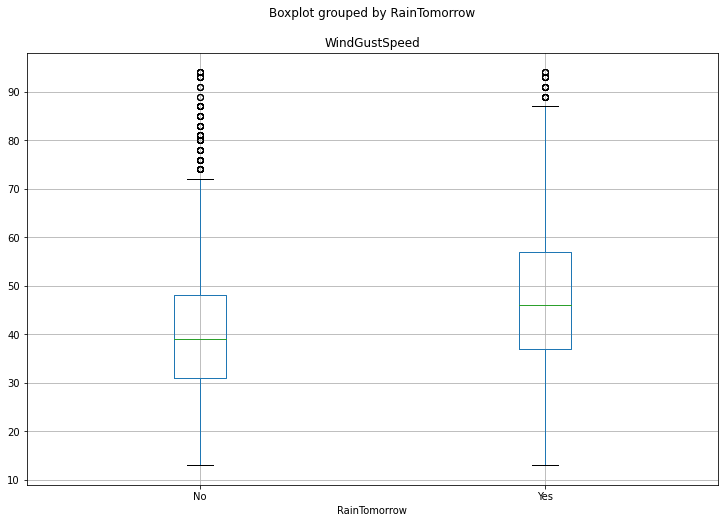

In [19]:
new_data.boxplot(column='WindGustSpeed', by='RainTomorrow')

# 2. Feature Distribution

### 2.1 Numerical

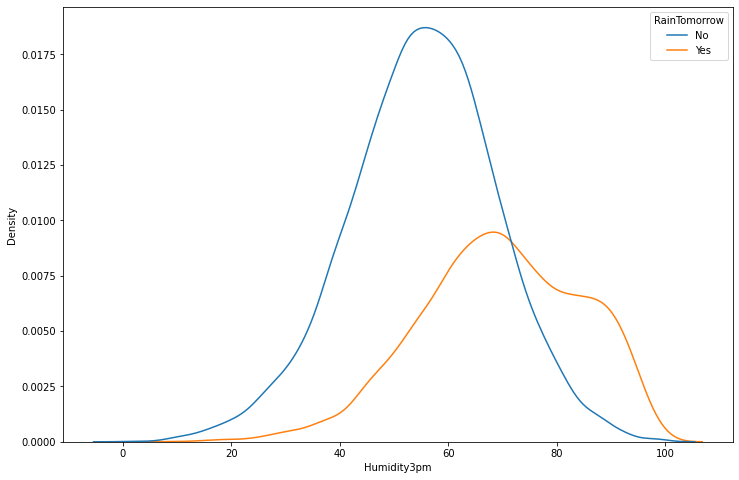

In [43]:
tmp_dist = sns.kdeplot(data=new_data, x='Humidity3pm', hue='RainTomorrow')

In [44]:
line = tmp_dist.lines[0]
line2 = tmp_dist.lines[1]

In [45]:
x1, y1 = line.get_data()
x2, y2 = line2.get_data()

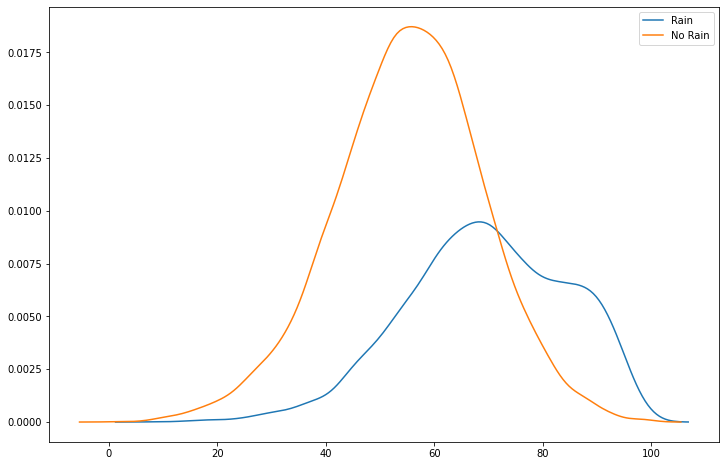

In [47]:
plt.plot(x1, y1, label='Rain')
plt.plot(x2, y2, label='No Rain')
plt.legend()

In [50]:
len(x1), len(x2)

(200, 200)

In [57]:
z = np.random.choice(x1, p=y1/sum(y1), size=1000)

/home/user/anaconda3/envs/rl/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user/anaconda3/envs/rl/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Density'>

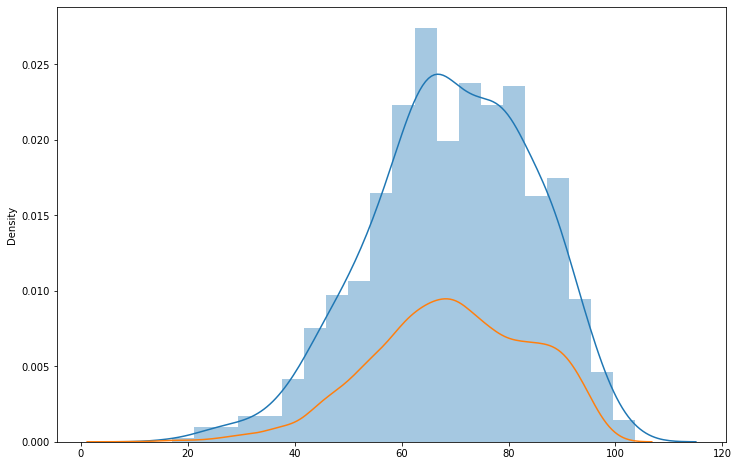

In [64]:
sns.distplot(z)
sns.lineplot(x1, y1)

### 2.2 Categorical

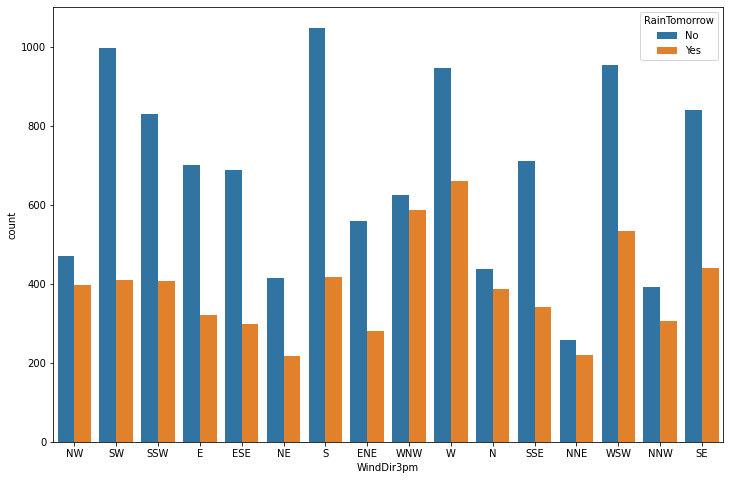

In [7]:
count = sns.countplot(data=new_data, x='WindDir3pm', hue='RainTomorrow')

In [45]:
values = count.patches

In [46]:
keys = count.get_xticklabels()
keys

[Text(0, 0, 'NW'),
 Text(1, 0, 'SW'),
 Text(2, 0, 'SSW'),
 Text(3, 0, 'E'),
 Text(4, 0, 'ESE'),
 Text(5, 0, 'NE'),
 Text(6, 0, 'S'),
 Text(7, 0, 'ENE'),
 Text(8, 0, 'WNW'),
 Text(9, 0, 'W'),
 Text(10, 0, 'N'),
 Text(11, 0, 'SSE'),
 Text(12, 0, 'NNE'),
 Text(13, 0, 'WSW'),
 Text(14, 0, 'NNW'),
 Text(15, 0, 'SE')]

In [52]:
bars = {}
for i in range(len(keys)):
    yes_value = values[i].get_height()
    no_value = values[i+len(keys)].get_height()
    bars[keys[i].get_text()] = {0: no_value, 1: yes_value}

bars

{'NW': {0: 398, 1: 470},
 'SW': {0: 410, 1: 997},
 'SSW': {0: 406, 1: 829},
 'E': {0: 321, 1: 700},
 'ESE': {0: 299, 1: 687},
 'NE': {0: 216, 1: 415},
 'S': {0: 417, 1: 1048},
 'ENE': {0: 280, 1: 558},
 'WNW': {0: 586, 1: 625},
 'W': {0: 661, 1: 947},
 'N': {0: 386, 1: 437},
 'SSE': {0: 340, 1: 711},
 'NNE': {0: 220, 1: 258},
 'WSW': {0: 533, 1: 953},
 'NNW': {0: 305, 1: 391},
 'SE': {0: 441, 1: 840}}

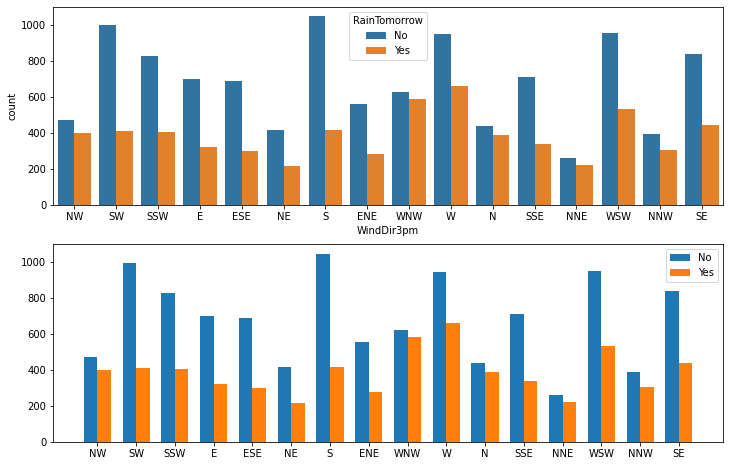

In [53]:
plt.subplot(2,1, 1)
sns.countplot(data=new_data, x='WindDir3pm', hue='RainTomorrow')
plt.subplot(2, 1, 2)
x = np.arange(len(bars))
plt.bar(x-0.35, height=[bars[key][1] for key in bars.keys()], label='No', width=0.35, align='edge')
plt.bar(x, height=[bars[key][0] for key in bars.keys()], label='Yes', width=0.35, align='edge')
plt.legend()
plt.xticks(x, bars.keys())
plt.show()

In [55]:
norm_0 = sum([bars[key][0] for key in bars.keys()])
norm_1 = sum([bars[key][1] for key in bars.keys()])
for key in bars.keys():
    bars[key][0] = bars[key][0]/norm_0
    bars[key][1] = bars[key][1]/norm_1
    
bars

{'NW': {0: 0.06399742723910597, 1: 0.04325418737345849},
 'SW': {0: 0.06592699790963177, 1: 0.0917540953432726},
 'SSW': {0: 0.06528380768612317, 1: 0.0762930241119087},
 'E': {0: 0.05161601543656536, 1: 0.06442113013068286},
 'ESE': {0: 0.04807846920726805, 1: 0.06322473771397018},
 'NE': {0: 0.03473227206946455, 1: 0.038192527148904844},
 'S': {0: 0.06705258080077182, 1: 0.09644763482422235},
 'ENE': {0: 0.045023315645602184, 1: 0.05135284373274434},
 'WNW': {0: 0.09422736774401029, 1: 0.0575188661881097},
 'W': {0: 0.1062871844347966, 1: 0.08715258604822382},
 'N': {0: 0.06206785656858016, 1: 0.0402171912387263},
 'SSE': {0: 0.054671168998231226, 1: 0.06543346217559359},
 'NNE': {0: 0.03537546229297315, 1: 0.023743787962451683},
 'WSW': {0: 0.0857050972825213, 1: 0.08770476716362967},
 'NNW': {0: 0.04904325454253095, 1: 0.03598380268728143},
 'SE': {0: 0.07091172214182344, 1: 0.07730535615681944}}

### 2.3 generalization

In [50]:
new_data = data.copy()

In [51]:
x, y = {}, {}
null_columns = new_data.columns[data.isnull().any()]
catetorical_cols = new_data[null_columns].select_dtypes(include='object').columns
float_cols = new_data[null_columns].select_dtypes(include=np.number).columns
int_cols = new_data.loc[:, new_data.nunique() < 150].select_dtypes(include=np.number).columns
float_cols = float_cols.drop(int_cols)

print(null_columns)
print(catetorical_cols)
print(float_cols)
print(int_cols)

def dist_categorical(data, col):
    assert col in catetorical_cols, f'{col} is not a categorical column'
    bars = sns.countplot(data=data, x=col, hue='RainTomorrow')
    keys = [key.get_text() for key in bars.get_xticklabels()]
    yes_values, no_values = bars.patches[:len(keys)], bars.patches[len(keys):]
    assert len(yes_values) == len(no_values), 'Number of yes and no values are not equal'
    
    x = {0: keys, 1: keys}
    y = {0: [v.get_height() for v in no_values], 1: [v.get_height() for v in yes_values]}
    y[0] = y[0]/sum(y[0])
    y[1] = y[1]/sum(y[1])
    plt.close()
    
    return x, y

def dist_float(data, col):
    assert col in float_cols, f'{col} is not a float column'
    kde = sns.kdeplot(data=data, x=col, hue='RainTomorrow', gridsize=1000)
    yes_line, no_line = kde.lines
    yes_x, yes_y = yes_line.get_data()
    no_x, no_y = no_line.get_data()
    
    no_y = no_y/sum(no_y)
    yes_y = yes_y/sum(yes_y)
    
    x = {0: no_x, 1: yes_x}
    y = {0: no_y, 1: yes_y}
    plt.close()
    
    return x, y

def dist_int(data, col):
    assert col in int_cols, f'{col} is not an int column'
    kde = sns.kdeplot(data=data, x=col, hue='RainTomorrow', gridsize=500)
    yes_line, no_line = kde.lines
    yes_x, yes_y = yes_line.get_data()
    no_x, no_y = no_line.get_data()
    
    yes_x = np.round(yes_x)
    no_x = np.round(no_x)
    
    new_yes_y = []
    for u in np.unique(yes_x):
        new_yes_y.append(sum(yes_y[yes_x == u]))
    
    new_no_y = []
    for u in np.unique(no_x):
        new_no_y.append(sum(no_y[no_x == u]))
    
    x = {0: np.unique(no_x), 1: np.unique(yes_x)}
    y = {0: np.array(new_no_y)/sum(new_no_y), 1: np.array(new_yes_y)/sum(new_yes_y)}
    plt.close()
    
    return x, y
        
x, y = {}, {}
for i, cols in enumerate([catetorical_cols, float_cols, int_cols]):
    dist = [dist_categorical, dist_float, dist_int][i]
    for col in cols:
        x[col], y[col] = dist(new_data, col)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')
Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')


본 데이터에는 int형임에도 float으로 저장되어 있는 column들이 있습니다.  
해당 column들은 `nunique()`를 통해 확인할 수 있으며 그 값이 150 이하라고 합시다.

아래의 `Cloud3pm` column도 역시나 `nunique()=10` 입니다.

In [52]:
x[col][0].shape, y[col][0].shape

((12,), (12,))

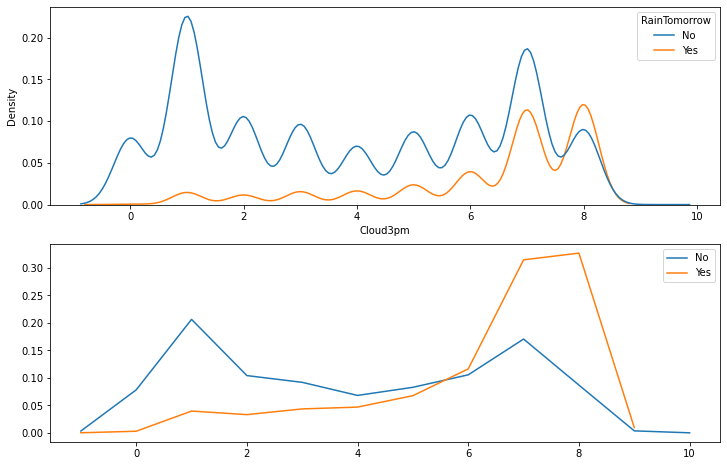

In [53]:
col = 'Cloud3pm'

plt.subplot(2, 1, 1)
sns.kdeplot(data=new_data, x=col, hue='RainTomorrow')

plt.subplot(2, 1, 2)
plt.plot(x[col][0], y[col][0], label='No')
plt.plot(x[col][1], y[col][1], label='Yes')
plt.legend()
plt.show()

# 3. impute

In [54]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin

class CustomImputer(BaseEstimator, TransformerMixin):

    def fit(self, X):
        label_col = 'RainTomorrow'
        self.X_ = X.copy()
        for col in null_columns:
            no_idx = X[(data[col].isnull()) & (X[label_col] == 'No')].index
            yes_idx = X[(data[col].isnull()) & (X[label_col] == 'Yes')].index
            
            no_impute = np.random.choice(x[col][0], size=len(no_idx), p=y[col][0])
            yes_impute = np.random.choice(x[col][1], size=len(yes_idx), p=y[col][1])
            
            self.X_.loc[no_idx, col] = no_impute
            self.X_.loc[yes_idx, col] = yes_impute
        
    def transform(self, X):
        return self.X_

In [55]:
imputer = CustomImputer()
imputer.fit(data)
filled_data = imputer.transform(data)

### Visual Validation

MinTemp    637
MaxTemp    322
dtype: int64/142193


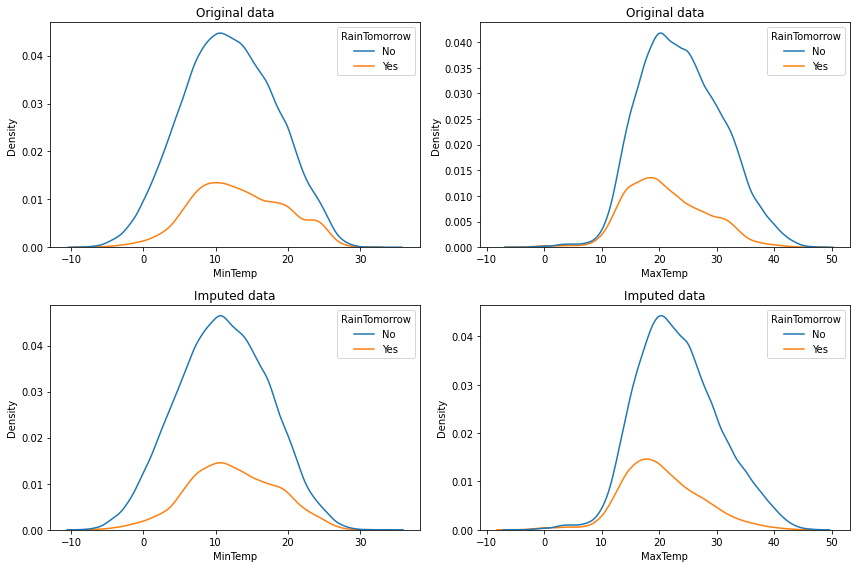

In [56]:
col = ['MinTemp', 'MaxTemp']

print(f'{data[col].isnull().sum()}/{len(filled_data)}')

fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(221), fig.add_subplot(222)

for i, ax in enumerate(axes):
    ax.set_title('Original data')
    sns.kdeplot(data=data, x=col[i], hue='RainTomorrow', ax=ax)
    
    ax = fig.add_subplot(2,2, i + 3, sharex=ax)
    ax.set_title('Imputed data')
    sns.kdeplot(data=filled_data[data.isnull().any(axis=1)], x=col[i], hue='RainTomorrow', ax=ax)
    
    plt.tight_layout()

Cloud9am    53657
Cloud3pm    57094
dtype: int64/142193


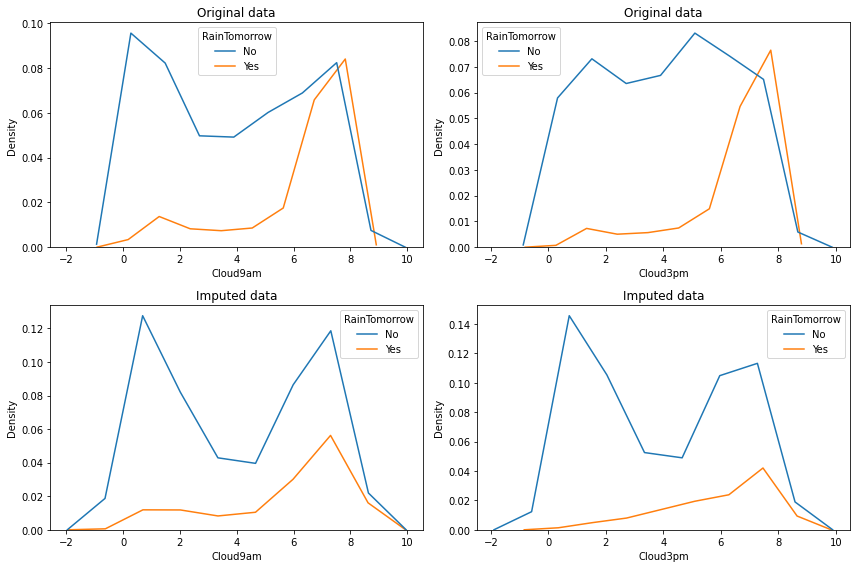

In [57]:
col = ['Cloud9am', 'Cloud3pm']

print(f'{data[col].isnull().sum()}/{len(filled_data)}')

fig = plt.figure(figsize=(12, 8))
axes = fig.add_subplot(221), fig.add_subplot(222)

for i, ax in enumerate(axes):
    ax.set_title('Original data')
    sns.kdeplot(data=data, x=col[i], hue='RainTomorrow', ax=ax, gridsize=10)
    
    ax = fig.add_subplot(2,2, i + 3, sharex=ax)
    ax.set_title('Imputed data')
    sns.kdeplot(data=filled_data[data.isnull().any(axis=1)], x=col[i], hue='RainTomorrow', ax=ax, gridsize=10)
    
    plt.tight_layout()

In [58]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [60]:
filled_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.184243,23.224927,2.361935,5.465567,7.642308,40.006351,14.001055,18.640953,68.849894,51.514639,1017.655595,1015.269937,4.414071,4.469819,16.987906,21.683212
std,6.404243,7.119409,8.503447,4.177371,3.801442,13.612999,8.892578,8.805701,19.052338,20.804804,7.110017,7.038408,2.892803,2.730121,6.492541,6.936283
min,-8.500000,-5.358951,-4.657787,-1.157531,-1.000000,6.000000,-1.000000,-3.000000,0.000000,0.000000,980.500000,977.100000,-1.000000,-1.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,5.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.976688,1010.462388,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.792292,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,15.000000,135.000000,130.000000,87.000000,104.000000,103.000000,1041.910610,1039.600000,9.000000,9.000000,40.200000,46.700000


In [61]:
filled_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# 5. Train

## 5.1 Preprocessing (one-hot encoding)

### 5.1.1 Date

In [2]:
catetorical_cols = filled_data.select_dtypes(include='object').columns
filled_data[catetorical_cols].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [ ]:
# date to datetime
filled_data['Date'] = pd.to_datetime(filled_data['Date'])
filled_data['Date'].head()

In [71]:
filled_data['Year'] = filled_data['Date'].dt.year
filled_data['Month'] = filled_data['Date'].dt.month
filled_data['Day'] = filled_data['Date'].dt.day

filled_data.drop('Date', axis=1, inplace=True)
filled_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,3.608333,12.0,W,44.0,W,WNW,...,1007.1,8.0,8.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,12.044047,11.0,WNW,44.0,NNW,WSW,...,1007.8,1.0,1.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,3.312343,9.0,WSW,46.0,W,WSW,...,1008.7,2.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,10.564097,13.0,NE,24.0,SE,E,...,1012.8,8.0,1.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,0.500438,6.0,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### 5.2.2 Categorical

#### Discrete value

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filled_data = pd.read_csv('data/weatherAUS_filled.csv')

In [30]:
catetorical_cols = filled_data.select_dtypes(include='object').columns
filled_data[catetorical_cols].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [31]:
print(filled_data['WindDir3pm'].unique())
print(filled_data['RainToday'].unique())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
['No' 'Yes']


In [32]:
# cardinal directions
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
filled_data[['WindGustDir', 'WindDir9am', 'WindDir3pm']] = filled_data[['WindGustDir', 'WindDir9am', 'WindDir3pm']].replace(directions, range(16))

In [33]:
filled_data[['RainToday', 'RainTomorrow']] = filled_data[['RainToday', 'RainTomorrow']].replace({'No': 0, 'Yes': 1})

In [34]:
filled_data[catetorical_cols].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [35]:
print(filled_data['WindGustDir'].unique())
print(filled_data['RainToday'].unique())

[12 13 11  2 15  0  1 10  3  7  8 14  6  5  4  9]
[0 1]


### Discrete, Independent value

In [36]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

<AxesSubplot:xlabel='count', ylabel='Location'>

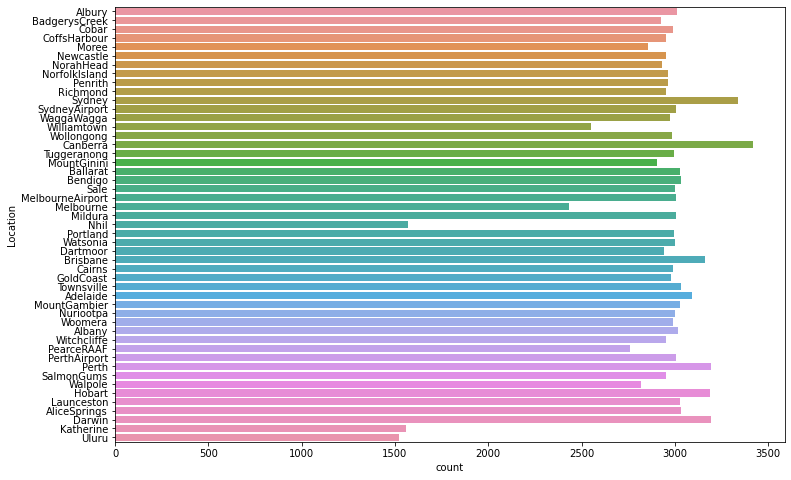

In [14]:
sns.countplot(data=filled_data, y='Location')

<AxesSubplot:ylabel='Location'>

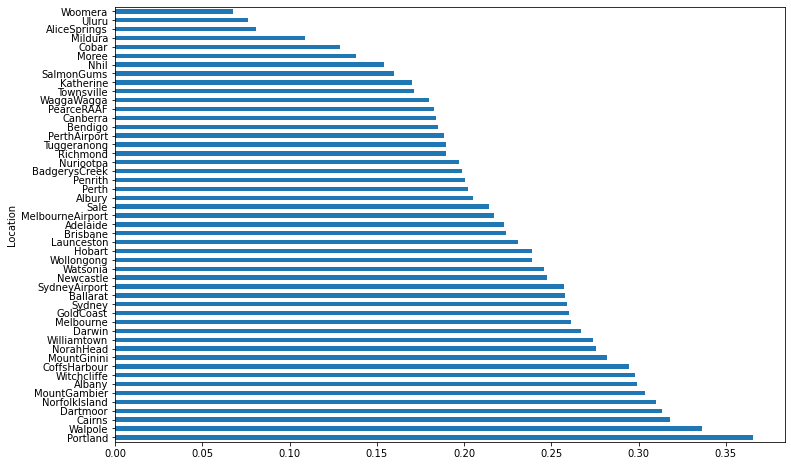

In [37]:
filled_data.groupby('Location')['RainTomorrow'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(12, 8))

In [38]:
location_ordered = filled_data.groupby('Location')['RainTomorrow'].mean().sort_values(ascending=False).index
filled_data['Location'] = filled_data['Location'].astype('category').cat.reorder_categories(location_ordered)

In [39]:
filled_data['Location'] = filled_data['Location'].cat.codes

In [40]:
filled_data['Location']

0         27
1         27
2         27
3         27
4         27
          ..
142188    47
142189    47
142190    47
142191    47
142192    47
Name: Location, Length: 142193, dtype: int8

In [128]:
# one hot encoding
filled_data = pd.get_dummies(filled_data, columns=['Location'], drop_first=True)

In [133]:
columns = filled_data.columns.tolist()
columns = ['Year', 'Month', 'Day'] + columns[: columns.index('Year')] + columns[columns.index('Day'):]
print(columns)

['Year', 'Month', 'Day', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Location_Walpole', 'Location_Cairns', 'Location_Dartmoor', 'Location_NorfolkIsland', 'Location_MountGambier', 'Location_Albany', 'Location_Witchcliffe', 'Location_CoffsHarbour', 'Location_MountGinini', 'Location_NorahHead', 'Location_Williamtown', 'Location_Darwin', 'Location_Melbourne', 'Location_GoldCoast', 'Location_Sydney', 'Location_Ballarat', 'Location_SydneyAirport', 'Location_Newcastle', 'Location_Watsonia', 'Location_Wollongong', 'Location_Hobart', 'Location_Launceston', 'Location_Brisbane', 'Location_Adelaide', 'Location_MelbourneAirport', 'Location_Sale', 'Location_Albury', 'Location_Perth', 'Location_Penrith', 'Location_BadgerysCreek', 'Location_Nuriootpa', '

In [134]:
filled_data = filled_data[columns]
filled_data

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Location_Townsville,Location_Katherine,Location_SalmonGums,Location_Nhil,Location_Moree,Location_Cobar,Location_Mildura,Location_AliceSprings,Location_Uluru,Location_Woomera
0,2008,12,1,13.4,22.9,0.6,3.608333,12.0,12,44.0,...,0,0,0,0,0,0,0,0,0,0
1,2008,12,2,7.4,25.1,0.0,12.044047,11.0,13,44.0,...,0,0,0,0,0,0,0,0,0,0
2,2008,12,3,12.9,25.7,0.0,3.312343,9.0,11,46.0,...,0,0,0,0,0,0,0,0,0,0
3,2008,12,4,9.2,28.0,0.0,10.564097,13.0,2,24.0,...,0,0,0,0,0,0,0,0,0,0
4,2008,12,5,17.5,32.3,1.0,0.500438,6.0,12,41.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017,6,20,3.5,21.8,0.0,5.828257,14.0,4,31.0,...,0,0,0,0,0,0,0,0,1,0
142189,2017,6,21,2.8,23.4,0.0,9.084147,11.0,4,31.0,...,0,0,0,0,0,0,0,0,1,0
142190,2017,6,22,3.6,25.3,0.0,12.784022,12.0,15,22.0,...,0,0,0,0,0,0,0,0,1,0
142191,2017,6,23,5.4,26.9,0.0,1.388408,6.0,0,37.0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int8   
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

## 5.2 Train Logics

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(filled_data.drop('RainTomorrow', axis=1), 
                                                    filled_data['RainTomorrow'], 
                                                    test_size=0.2, random_state=42, stratify=filled_data['RainTomorrow'])

np.mean(y_train), np.mean(y_test)

(0.2241855231464388, 0.2241640001406519)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

reg = LogisticRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8630753542670276
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22064
           1       0.75      0.59      0.66      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.77      0.79     28439
weighted avg       0.86      0.86      0.86     28439



In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_score(y_test, y_pred)

0.7658065556171707

In [24]:
from sklearn.model_selection import StratifiedKFold

train_data = filled_data.drop('RainTomorrow', axis=1)
label = filled_data['RainTomorrow']

n_fold = 5
accuracies = []

for train_idx, test_idx in StratifiedKFold(n_fold).split(train_data, label):
    X_train, X_test = train_data.iloc[train_idx], train_data.iloc[test_idx]
    y_train, y_test = label.iloc[train_idx], label.iloc[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    
    y_pred = reg.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'Accuracy: {acc}')

print(np.mean(accuracies))

Accuracy: 0.8649389922289813
Accuracy: 0.8571679735574387
Accuracy: 0.8435599001371357
Accuracy: 0.8644771080948027
Accuracy: 0.8718967578592025
0.8604081463755122


# 6. DL

In [43]:
filled_data['Location'] = filled_data['Location'].astype('category')
filled_data['Location']

0         27
1         27
2         27
3         27
4         27
          ..
142188    47
142189    47
142190    47
142191    47
142192    47
Name: Location, Length: 142193, dtype: category
Categories (49, int64): [0, 1, 2, 3, ..., 45, 46, 47, 48]

In [45]:
filled_data = pd.get_dummies(filled_data, columns=['Location'], drop_first=True)

In [46]:
columns = filled_data.columns.tolist()
columns = ['Year', 'Month', 'Day'] + columns[: columns.index('Year')] + columns[columns.index('Day'):]
print(columns)

['Year', 'Month', 'Day', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5', 'Location_6', 'Location_7', 'Location_8', 'Location_9', 'Location_10', 'Location_11', 'Location_12', 'Location_13', 'Location_14', 'Location_15', 'Location_16', 'Location_17', 'Location_18', 'Location_19', 'Location_20', 'Location_21', 'Location_22', 'Location_23', 'Location_24', 'Location_25', 'Location_26', 'Location_27', 'Location_28', 'Location_29', 'Location_30', 'Location_31', 'Location_32', 'Location_33', 'Location_34', 'Location_35', 'Location_36', 'Location_37', 'Location_38', 'Location_39', 'Location_40', 'Location_41', 'Location_42', 'Location_43', 'Location_44', 'Location_45', 'Location_46',

In [47]:
filled_data = filled_data[columns]
filled_data

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Location_39,Location_40,Location_41,Location_42,Location_43,Location_44,Location_45,Location_46,Location_47,Location_48
0,2008,12,1,13.4,22.9,0.6,3.608333,12.0,12,44.0,...,0,0,0,0,0,0,0,0,0,0
1,2008,12,2,7.4,25.1,0.0,12.044047,11.0,13,44.0,...,0,0,0,0,0,0,0,0,0,0
2,2008,12,3,12.9,25.7,0.0,3.312343,9.0,11,46.0,...,0,0,0,0,0,0,0,0,0,0
3,2008,12,4,9.2,28.0,0.0,10.564097,13.0,2,24.0,...,0,0,0,0,0,0,0,0,0,0
4,2008,12,5,17.5,32.3,1.0,0.500438,6.0,12,41.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017,6,20,3.5,21.8,0.0,5.828257,14.0,4,31.0,...,0,0,0,0,0,0,0,0,1,0
142189,2017,6,21,2.8,23.4,0.0,9.084147,11.0,4,31.0,...,0,0,0,0,0,0,0,0,1,0
142190,2017,6,22,3.6,25.3,0.0,12.784022,12.0,15,22.0,...,0,0,0,0,0,0,0,0,1,0
142191,2017,6,23,5.4,26.9,0.0,1.388408,6.0,0,37.0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
train_data = filled_data.drop('RainTomorrow', axis=1)
label = filled_data['RainTomorrow']

In [54]:
import torch as th
import torch.nn as nn
import torch.functional as F

X_train, X_test, y_train, y_test = train_test_split(train_data, label, test_size=0.2, random_state=42, stratify=label)
print(np.mean(y_train), np.mean(y_test))

0.2241855231464388 0.2241640001406519


In [56]:
X_train.shape

(113754, 72)

In [57]:
X_train

,Year,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Location_39,Location_40,Location_41,Location_42,Location_43,Location_44,Location_45,Location_46,Location_47,Location_48
101064,2012,1,25,19.300000,34.800000,0.0,13.800000,12.5,6,56.0,...,0,0,0,0,0,0,0,0,0,0
18241,2010,8,6,12.723107,16.024403,0.2,3.460338,4.0,8,39.0,...,0,0,0,0,0,0,0,0,0,0
96741,2016,11,30,13.000000,23.400000,0.0,5.828257,6.0,11,43.0,...,0,0,0,0,0,0,0,0,0,0
139785,2015,1,7,25.000000,33.400000,0.0,5.800000,6.0,14,63.0,...,0,1,0,0,0,0,0,0,0,0
83246,2012,11,12,15.300000,25.800000,0.0,8.000000,11.7,4,30.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69572,2012,11,23,12.400000,32.300000,0.0,10.200000,10.5,2,24.0,...,0,0,0,0,0,0,1,0,0,0
7719,2014,2,19,23.000000,34.100000,0.0,8.200000,11.0,12,56.0,...,0,0,0,0,0,1,0,0,0,0
41955,2010,8,10,9.300000,16.200000,4.0,3.900470,2.0,1,43.0,...,0,0,0,0,0,0,0,0,0,0
117112,2015,11,9,14.700000,30.400000,0.0,7.000000,12.4,4,52.0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from torch.utils.data import DataLoader, TensorDataset, default_collate

train_dataset = TensorDataset(th.tensor(X_train.values, dtype=th.float32), th.tensor(y_train.values, dtype=th.float32))
test_dataset = TensorDataset(th.tensor(X_test.values, dtype=th.float32), th.tensor(y_test.values, dtype=th.float32))

train_dataloader = DataLoader(train_dataset, batch_size=265, shuffle=True,
                              collate_fn=lambda x: tuple(x_.to(th.device('cuda')) for x_ in default_collate(x)))
test_dataloader = DataLoader(test_dataset, batch_size=265, shuffle=False,
                             collate_fn=lambda x: tuple(x_.to(th.device('cuda')) for x_ in default_collate(x)))

In [81]:
class TmpClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.BatchNorm1d(72),
            nn.Linear(72, 256),
            nn.GELU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128),
            nn.GELU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.layers(x)
    
model = TmpClassifier()

In [82]:
from tqdm import tqdm

criterion = nn.BCELoss()

# parameter initialize
for param in model.parameters():
    if param.dim() > 1:
        nn.init.xavier_uniform_(param)

model = TmpClassifier().to('cuda')
model.train()

optimizer = th.optim.Adam(model.parameters(), lr=0.001)
losses = []
n_epoch = 120
procress = tqdm(range(n_epoch), desc='Training')

for epoch in procress:
    epoch_loss = []
    for X_, y_ in train_dataloader:
        # X_, y_ = X.to('cuda'), y.to('cuda')
        y_pred = model(X_)
        loss = criterion(y_pred, y_.view(-1, 1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss.append(loss.item())
    losses.append(np.mean(epoch_loss))
    procress.set_postfix({'loss': np.mean(losses[-100:])})

Training: 100%|██████████| 100/100 [02:40<00:00,  1.61s/it, loss=0.125]


In [77]:
len(losses)

100

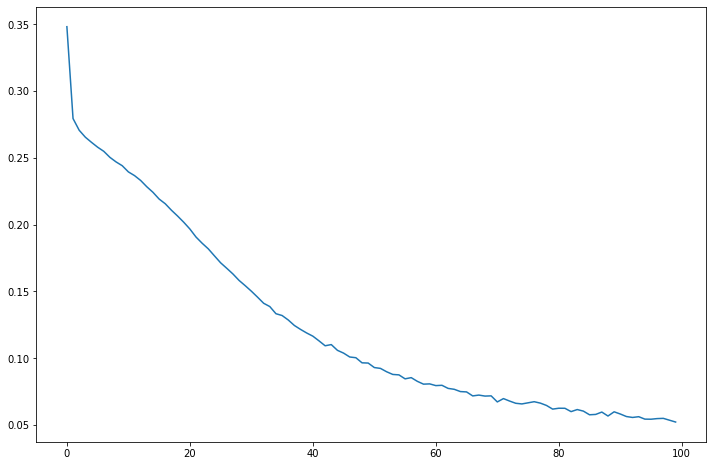

In [83]:
plt.plot(losses)

In [84]:
model.eval()
y_pred = []
y_eval = []
for X_, y_ in test_dataloader:
    y_pred.append(model(X_).cpu().detach().numpy())
    y_eval.append(y_.cpu().detach().numpy())
    
y_pred = np.concatenate(y_pred)
y_eval = np.concatenate(y_eval)

print(accuracy_score(y_eval, y_pred > 0.5))

0.8569569956749534


## 5.1 RNN